Classical 1-D acceleration with The Heun Method
-----------------------------------------------

Suppose we have a constant force $F_0$ acting on a fixed mass for a period of time. At low speeds the momentum principle gives us:

$$\frac{dv}{dt} = \frac{F_0}{m}$$

and we also know that

$$\frac{dx}{dt} = v$$

which form a set of two coupled differential equations to be solved for the position and velocity of the mass.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


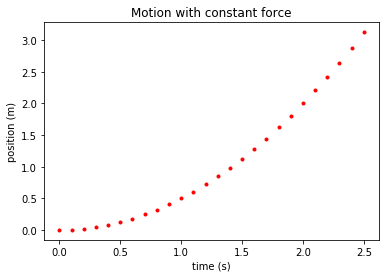

In [2]:
m=1.0    # assume one kilogram
F0=1.0   # and one newton, just for illustration

v0 = 0.0  # start at rest
x0 = 0.0  # at the origin
xf = 3.0  # go to 3.0m
dt = 0.1  # 0.1 sec intervals
t = 0.0   # start at t=0.0s

s=array([x0, v0])  # the "state" will be position and velocity

def derivs_F(s, t):

    x=s[0]     # extract position and velocity from the "state"
    v=s[1]
    
    dxdt=v     # use the recipe here to get dvdt 
    dvdt=F0/m  # and dxdt
    
    return array([dxdt, dvdt])

def HeunStep(s, t, derivs, dt):
    f1=derivs(s,t)
    f2=derivs(s+f1*dt,t+dt)
    return s + 0.5*(f1+f2)*dt

xlist = [x0]
tlist = [t]

while s[0] < xf:
    s = HeunStep(s, t, derivs_F, dt)
    t += dt
    xlist.append(s[0])
    tlist.append(t)

title('Motion with constant force')
xlabel('time (s)')
ylabel('position (m)')
plot(tlist, xlist, 'r.')